# Machine Learning Regression

*Author: Evan Carey*

*Copyright 2017, BH Analytics, LLC*

## Overview

The purpose of this section is to go over machine learning, specifically regression, in the context of python (the scikitlearn module). We will include general concepts of machine learning as well as the specifics of a few different regression algorithms. For further reading, I highly recommend the free ebook titled 'Introduction to Statistical Learning' by Gareth James. A quick web search should find this book near the top of the search results. For even more in-depth coverage of machine learning algorithms, I recommend the book  'Elements of Statistical Learning' by Trevor Hastie (also free online). 

The data used to support this section is a synthetic dataset representing sales data. There are two files. We will fit a model on the first file, then use the results to make prediction on the second file. 

## Libraries

In [1]:
## Import Modules
import os
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.metrics import confusion_matrix
import sklearn
from sklearn import datasets
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels
import seaborn as sns

In [2]:
## Enable inline plotting for graphics
%matplotlib inline

In [3]:
## Get Version information
print(sys.version)
print("Pandas version: {0}".format(pd.__version__))
print("Matplotlib version: {0}".format(matplotlib.__version__))
print("Numpy version: {0}".format(np.__version__))
print("SciKitLearn version: {0}".format(sklearn.__version__))
print("Statsmodels version: {0}".format(statsmodels.__version__))

3.6.0 |Anaconda custom (64-bit)| (default, Dec 23 2016, 11:57:41) [MSC v.1900 64 bit (AMD64)]
Pandas version: 0.19.2
Matplotlib version: 2.0.0
Numpy version: 1.11.3
SciKitLearn version: 0.18.1
Statsmodels version: 0.6.1


## Check your working directory

Subsequent sessions may require you to identify and update your working directory so paths correctly point at the downloaded data files. You can check your working directory like so:

In [4]:
## Check/set your working directory
print("My working directory:\n" + os.getcwd())
# Set Working Directory (if needed)
os.chdir(r"C:\Users\evan\Dropbox\BH_Katie_Share\Goldman_Sachs")
print("My new working directory:\n" + os.getcwd())

My working directory:
J:\Sync\Work\BHAnalytics\Python\01_Current_Python\notebooks
My new working directory:
C:\Users\evan\Dropbox\BH_Katie_Share\Goldman_Sachs


## Machine Learning

* Machine learning is the science of programming algorithms to learn from data.
* Machine learning is focused on prediction – Predictive Modeling
* Machine learning typically uses finite sample properties to optimize models
* Traditional statistics focuses on process inference -statistical inference
* Traditional statistics often use asymptotic properties to make inference
* In practice, there is much overlap between the disciplines...

## Machine Learning Terminology

* Target: what I want to predict
* Inputs: The variables I am using to predict the target
* Samples: The rows of the dataframe
* Unsupervised Learning: Algorithms without a target
* Clustering
* Dimensionality Reduction
* Supervised Learning: Algorithms using a target
* Classication: Target is discrete
* Regression: Target is continuous

## Variance, Bias, Over-fitting

* Variance refers to how variables your estimates are
* Bias refers to how accurate your estimates are
* Think of shooting arrows at a target: Low bias means on average, you get close to the center. Low variance means your arrows are all close together
* There is often a tradeoff between bias and variance.
* Over-fitting our data: too many attempts at fitting leads to a great fit...but only for this data?


## Avoiding Overfitting

* Incorporate your topical knowledge when selecting features
* The best models come from careful feature selection rather than automated decisions.
* Remove redundant variables (highly correlated)
* Censor values in your data you know to be inaccurate (Careful data cleaning)
* Identify structure in your data and use it appropriately

## Cross Validation

* Create training and test datasets
* Independence between sets
* Remove redundant variables (highly correlated)
* Run this several times
* Be wary of implausibly great results - may have overfit the data

## Steps to Machine Learning

* Identify your question to be answered: classification, regression, or clustering?
* What data is available?
* Do you have targets (supervised) ?
* What features make the most sense in the context of your problem?
* Clean your data for unlikely values, examine your dataset
* Identify models that correspond to your structural requirements
* Unsupervised versus supervised
* Classification or regression?
* Distribution of the target (how many levels, what is the domain of the numbers if regression)

## Datasets in scikitlearn

* Some datasets come internally with Scikit-learn
* We can load them with datasets.load()

In [5]:
from sklearn import datasets

## Datasets that come with SK Learn
diabetes = datasets.load_diabetes()
boston = datasets.load_boston()
iris = datasets.load_iris()
linnerud = datasets.load_linnerud()

## Dataset Attributes

* The datasets have multiple attributes that can be accessed, including DESCR, data, and target.
* The .data is the X (inputs), the .target is the Y (outcome)

In [6]:
boston = datasets.load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
dir(boston)

['DESCR', 'data', 'feature_names', 'target']

In [8]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [9]:
boston.data.shape

(506, 13)

In [10]:
np.set_printoptions(linewidth=100)
boston.data[0:5,:]

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00,   0.00000000e+00,   5.38000000e-01,
          6.57500000e+00,   6.52000000e+01,   4.09000000e+00,   1.00000000e+00,   2.96000000e+02,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00,   0.00000000e+00,   4.69000000e-01,
          6.42100000e+00,   7.89000000e+01,   4.96710000e+00,   2.00000000e+00,   2.42000000e+02,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00,   0.00000000e+00,   4.69000000e-01,
          7.18500000e+00,   6.11000000e+01,   4.96710000e+00,   2.00000000e+00,   2.42000000e+02,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       [  3.23700000e-02,   0.00000000e+00,   2.18000000e+00,   0.00000000e+00,   4.58000000e-01,
          6.99800000e+00,   4.58000000e+01,   6.06220000e+00,   3.00000000e+00,   2.22000000e+02,
          1.87000000e+01,  

In [11]:
boston.target

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,  18.9,  15. ,  18.9,  21.7,
        20.4,  18.2,  19.9,  23.1,  17.5,  20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,
        16.6,  14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,  20. ,  21. ,  24.7,
        30.8,  34.9,  26.6,  25.3,  24.7,  21.2,  19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,
        25. ,  23.4,  18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,  25. ,  33. ,
        23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,  22.8,  23.4,  24.1,  21.4,  20. ,  20.8,
        21.2,  20.3,  28. ,  23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,  22.6,
        22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,  33.2,  27.5,  26.5,  18.6,  19.3,
        20.1,  19.5,  19.5,  20.4,  19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,  15.7,  16.2,  18. ,  14.3,
        19.2,  19.6,

## Create a Pandas Dataframe from this Data

Let's create a Pandas dataframe from this dataset to replicate the full process of turning a dataframe into numpy arrays.

In [12]:
boston_df = pd.DataFrame(boston.data)

In [13]:
boston_df.columns = boston.feature_names

In [14]:
boston_df['median_value'] = boston.target

In [15]:
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  median_value  
0     15.3  396.90   4.98          24.0  
1     17.8  396.90   9.14          21.6  
2     17.8  392.83   4.03          34.7  
3     18.7  394.63   2.94          33.4  
4     18.7  396.90   5.33          36.2

## Workflow into scikit-learn

* There are a number of possible ways to prepare data for modeling in SciKit-Learn. 
* You must end up with a numeric ndarray of inputs (X) and a numeric ndarray matrix of the target (Y)
* I prefer the following workflow:

* We use pandas to import and clean data
* We use Patsy to create the X and Y ndarrays
* Using categorical transformations (dummy coding) as needed
* Also can generate non-linear terms including splines
* Use scikit-learn for machine learning

## Use Patsy to Create the Model Matrices

We typically start out with a pandas dataframe for manipulation purposes, then we will use this dataframe as the input to the machine learning library. I created a pandas dataframe above to replicate this process. We will use the dmatrices function from the patsy library to easily generate the design matrices for the machine learning algorithms. 

In [16]:
## Create formula for all variables in model
vars_remove = ['median_value']
vars_left = set(boston_df.columns) - set(vars_remove)
formula = "median_value ~ " + " + ".join(vars_left)
formula

'median_value ~ NOX + RAD + INDUS + PTRATIO + TAX + AGE + LSTAT + RM + DIS + CRIM + CHAS + B + ZN'

In [17]:
## use Patsy to create model matrices
Y,X = dmatrices(formula,
                boston_df)

In [18]:
Y

DesignMatrix with shape (506, 1)
  median_value
          24.0
          21.6
          34.7
          33.4
          36.2
          28.7
          22.9
          27.1
          16.5
          18.9
          15.0
          18.9
          21.7
          20.4
          18.2
          19.9
          23.1
          17.5
          20.2
          18.2
          13.6
          19.6
          15.2
          14.5
          15.6
          13.9
          16.6
          14.8
          18.4
          21.0
  [476 rows omitted]
  Terms:
    'median_value' (column 0)
  (to view full data, use np.asarray(this_obj))

In [19]:
X

DesignMatrix with shape (506, 14)
  Columns:
    ['Intercept',
     'NOX',
     'RAD',
     'INDUS',
     'PTRATIO',
     'TAX',
     'AGE',
     'LSTAT',
     'RM',
     'DIS',
     'CRIM',
     'CHAS',
     'B',
     'ZN']
  Terms:
    'Intercept' (column 0)
    'NOX' (column 1)
    'RAD' (column 2)
    'INDUS' (column 3)
    'PTRATIO' (column 4)
    'TAX' (column 5)
    'AGE' (column 6)
    'LSTAT' (column 7)
    'RM' (column 8)
    'DIS' (column 9)
    'CRIM' (column 10)
    'CHAS' (column 11)
    'B' (column 12)
    'ZN' (column 13)
  (to view full data, use np.asarray(this_obj))

## Split into Testing and Training Samples

* The first step is to set aside a test sample of data that will allow us to examine the quality of our models. This protects against overfitting. 
* We can use “tuple unpacking” to assign the values (very pythonic :)
* We can assign a random seed (state) and fraction to split.

In [20]:
## Split Data into training and sample
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.data,
                                                    boston.target,
                                                    test_size=0.25,
                                                    random_state=42)

## Confirm the Output Dimensions

* We can confirm the dimensions of the data are the same within test and train
* The proportion should also be close to the test_size argument. 

In [21]:
## Confirm dimensions
X_train.shape

(379, 13)

In [22]:
X_test.shape

(127, 13)

In [23]:
y_train.shape

(379,)

In [24]:
y_test.shape

(127,)

In [25]:
## Examine the shape of X
X_test.shape

(127, 13)

## Examine the Dataset: Outcome Distribution

First, let's examine the dataset to get a sense of what we are modeling. We will start by looking at the outcome distribution.

C:\Users\evan\Miniconda3\envs\py3ds\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


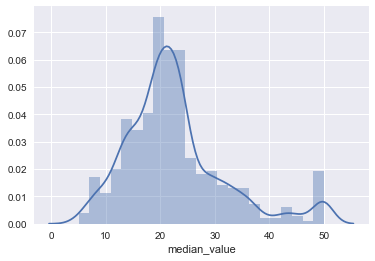

In [26]:
sns.distplot(boston_df.median_value)

This looks reasonable, with some odd outliers at the high end of the distribution. 

Let's look at the distribution of the rest of the variables.

In [27]:
boston_df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  median_value  
count  506.000000    506.000000  
mean    12.653063     22.532806  
std      7.141062      9.197104  
min      1.730000      5.000000  
25%      6.950000     17.025000  
50%     11.360000     21.200000  
75%     16.955000     25.000000  
max     37.970000     50.000000

## First Model: Linear Regression

* We will start with a basic linear model (OLS regression).
* The flow will be similar for all other models:
* Call and save model object with initial parameters, then call the fit() method, then call other summary methods post fit. 

In [28]:
## import linear model
from sklearn import linear_model
## Define model parameters
clf = linear_model.LinearRegression(fit_intercept=True)
## fit model using data with .fit
clf.fit(X_train,y_train)
## Make predictions on test dataset
clf.predict(X_test)

array([ 28.84435256,  36.01528645,  15.09049798,  25.23939437,  18.87034833,  23.21842749,
        17.59151854,  14.29798014,  23.05832558,  20.62071271,  24.79141889,  18.66756318,
        -7.00821616,  21.83986892,  19.21327964,  26.27933286,  20.5475019 ,   5.65228818,
        40.41962746,  17.63739357,  27.32663541,  30.05426616,  11.13958579,  24.1141802 ,
        17.87975122,  15.79393109,  22.95810173,  14.19824493,  22.27171161,  19.24893029,
        22.27637518,  25.24589065,  25.6906829 ,  17.99006013,  16.69109685,  17.10092877,
        31.19877823,  20.17867405,  23.72051289,  24.79532938,  13.94447612,  32.00271322,
        42.53357742,  17.45043617,  27.15727227,  17.07463384,  13.88645803,  26.06800047,
        20.36819247,  29.98424831,  21.35765004,  34.32583526,  15.87960152,  26.17795749,
        39.5103807 ,  22.8404951 ,  18.9447771 ,  32.69008797,  25.02268835,  12.90262737,
        22.75348627,  30.5313448 ,  31.61070012,  15.91080308,  20.50212053,  16.51289219,

## Model Summaries

* We can extract the model coefficients with the .coef_ attribute.
* The model goodness of fit is determined by predicting on the hold out (test) set, then scoring the predictions. 

In [29]:
## Get coefficients
clf.coef_

array([ -1.27824912e-01,   2.95208977e-02,   4.92643105e-02,   2.77594439e+00,  -1.62801962e+01,
         4.36089596e+00,  -9.19111559e-03,  -1.40172019e+00,   2.57458956e-01,  -9.94705777e-03,
        -9.24266403e-01,   1.33164215e-02,  -5.18565634e-01])

In [30]:
# The mean square error
print("Residual sum of squares for null model:",
      np.mean((np.mean(y_train) - y_train) ** 2))
print("Residual sum of squares:",
      np.mean((clf.predict(X_train) - y_train) ** 2))

Residual sum of squares for null model: 88.681731539
Residual sum of squares: 22.3384671132


## Model Score

In the linear model case (and most regression), the model score is the mean squared error. 
The best score is 1, the worst score is 0.

In [31]:
## Change in squared error as a percent of total squared error
1 - 22.3435455512/88.681731539

0.7480479331712884

In [32]:
## Explained Variance Score
## Higher is better
clf.score(X_train,y_train)

0.74810519905859896

In [33]:
## Score this model on the testing data
clf.score(X_test,y_test)

0.68395572431792129

## Prediction from the Model

* We can easily predict from the model using the predict method.
* You must supply a new X for predictions of the correct shape. 
* Here, I simply predict base on the mean covariate values. 

In [34]:
## Make Prediction for the average value
## Notice the reshape…
clf.predict(np.mean(X_train,0).reshape(1,13))

array([ 22.90791557])

We could also make predictions on the test data set...

In [35]:
clf.predict(X_test)

array([ 28.84435256,  36.01528645,  15.09049798,  25.23939437,  18.87034833,  23.21842749,
        17.59151854,  14.29798014,  23.05832558,  20.62071271,  24.79141889,  18.66756318,
        -7.00821616,  21.83986892,  19.21327964,  26.27933286,  20.5475019 ,   5.65228818,
        40.41962746,  17.63739357,  27.32663541,  30.05426616,  11.13958579,  24.1141802 ,
        17.87975122,  15.79393109,  22.95810173,  14.19824493,  22.27171161,  19.24893029,
        22.27637518,  25.24589065,  25.6906829 ,  17.99006013,  16.69109685,  17.10092877,
        31.19877823,  20.17867405,  23.72051289,  24.79532938,  13.94447612,  32.00271322,
        42.53357742,  17.45043617,  27.15727227,  17.07463384,  13.88645803,  26.06800047,
        20.36819247,  29.98424831,  21.35765004,  34.32583526,  15.87960152,  26.17795749,
        39.5103807 ,  22.8404951 ,  18.9447771 ,  32.69008797,  25.02268835,  12.90262737,
        22.75348627,  30.5313448 ,  31.61070012,  15.91080308,  20.50212053,  16.51289219,

## Penalized Linear Regression: Ridge Regression

* Ridge regression enforces an L2 penalty (regularization of the L2-norm)
* Parameters are shrunk towards zero
* All parameters should be retained
* Correlated inputs will “share” the effect size
* Alpha is the degree of penalty

In [36]:
## ridge regression, set alpha to 0.1
clf = linear_model.Ridge(alpha=0.1)
clf.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [37]:
## Score this model on the training data
clf.score(X_train,y_train)

0.74804793317124674

In [38]:
## Score this model on the testing data
clf.score(X_test,y_test)

0.68333884019165891

In [39]:
# The mean square error
print("Residual mean sum of squares:",
      np.mean((clf.predict(X_test) - y_test) ** 2))

Residual mean sum of squares: 22.1748765276


## Scaling / Pipeline

* We should consider scaling when we use shrinkage methods. 
* We can construct a pipeline to avoid having to apply the same transformation over and over again.
* We must use the StandardScaler() function here.

In [40]:
## ridge regression, set alpha
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
clf = linear_model.Ridge(alpha=0.1)
scaler = preprocessing.StandardScaler().fit(X_train)
pipe1 = Pipeline([("scale", scaler),
                     ("ridge", clf)])
pipe1.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [41]:
## Score on training data
pipe1.score(X_train,y_train) 

0.74810503257690697

In [42]:
## Score on testing data
pipe1.score(X_test,y_test) 

0.68393076501127092

## Selecting Parameters via Cross Validation

For the ridge regression, the primary parameter of interest ist alpha. We can select the shrinkage parameter (alpha) through cross-validation. The default cross validation strategy is called 'leave one out'. We can also select a specific number of folds and do k-folds cross validation. 

In [43]:
## Select the alpha through cross validation (leave one out)
clf = linear_model.RidgeCV(alphas=[0.01, 0.5, 0.1, 0.15, 0.2, 0.5])
scaler = preprocessing.StandardScaler()
pipe2 = Pipeline([("scale", scaler),
                     ("ridge", clf)])
pipe2.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', RidgeCV(alphas=[0.01, 0.5, 0.1, 0.15, 0.2, 0.5], cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False))])

In [44]:
pipe2.named_steps['ridge'].alpha_

0.5

In [45]:
## Examine the score of the model on training data
pipe2.score(X_train,y_train) 

0.74810112902756321

In [46]:
## Score on testing data
pipe2.score(X_test,y_test) 

0.6838306783967385

In [47]:
## Select the alpha by 10 fold cross validation
clf = linear_model.RidgeCV(alphas=[0.01, 0.05, 0.1, 0.15, 0.2, 0.5],
                          cv=10)
scaler = preprocessing.StandardScaler()
pipe3 = Pipeline([("scale", scaler),
                     ("ridge", clf)])
pipe3.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', RidgeCV(alphas=[0.01, 0.05, 0.1, 0.15, 0.2, 0.5], cv=10, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False))])

In [48]:
pipe3.named_steps['ridge'].alpha_

0.5

In [49]:
## Examine the score of the model on training data
pipe3.score(X_train,y_train) 

0.74810112902756332

In [50]:
## Score on testing data
pipe3.score(X_test,y_test) 

0.68383067839685419

## Alpha Selection

In both cases, we found an alpha of 0.5 to be optimal.

## Penalized Linear Regression: LASSO

* LASSO regression is also as shrinkage estimator (penalty). 
* LASSO uses an L1 penalty, and variables can be dropped as a result of shrinkage (coefficients set to 0)
* If there are correlated inputs, only one will dominate in the shrinkage, while the other will be set to a small coefficient (or 0)

In [51]:
## LASSO regression
clf = linear_model.Lasso(alpha = 0.1)
clf.fit(X_train,y_train)
clf.coef_

array([ -1.17027718e-01,   3.33740085e-02,  -3.30472185e-03,   1.03438493e+00,  -0.00000000e+00,
         4.20306143e+00,  -1.82671800e-02,  -1.10884889e+00,   2.33935911e-01,  -1.22639546e-02,
        -7.38277357e-01,   1.40315860e-02,  -5.76328939e-01])

## Cross Validating Alpha

The LASSO regression also has a parameter which must be selected. Alpha is the degree of shrinkage for the penalty. We can cross validate this parameter just as we did in the ridge regression:

In [52]:
## Select the alpha through cross validation (leave one out)
clf = linear_model.LassoCV(alphas=[0.01, 0.05, 0.1, 0.15, 0.2, 0.5])
scaler = preprocessing.StandardScaler()
pipe4 = Pipeline([("scale", scaler),
                  ("lasso", clf)])
pipe4.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', LassoCV(alphas=[0.01, 0.05, 0.1, 0.15, 0.2, 0.5], copy_X=True, cv=None,
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False))])

In [53]:
pipe4.named_steps['lasso'].alpha_

0.01

In [54]:
## Examine the score of the model on training data
pipe4.score(X_train,y_train) 

0.74802655943421703

In [55]:
## Score on testing data
pipe4.score(X_test,y_test) 

0.68369622271858033

In [56]:
## Select the alpha by 10 fold cross validation
clf = linear_model.LassoCV(alphas=[0.01, 0.05, 0.1, 0.15, 0.2, 0.5],
                          cv=10)
scaler = preprocessing.StandardScaler()
pipe5 = Pipeline([("scale", scaler),
                  ("lasso", clf)])
pipe5.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', LassoCV(alphas=[0.01, 0.05, 0.1, 0.15, 0.2, 0.5], copy_X=True, cv=10,
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False))])

In [57]:
pipe5.named_steps['lasso'].alpha_

0.01

In [58]:
## Examine the score of the model on training data
pipe5.score(X_train,y_train) 

0.74802655943421703

In [59]:
## Score on testing data
pipe5.score(X_test,y_test) 

0.68369622271858033

## Implementing Polynomial and Interaction Terms

* We can add polynomials as well as interactions using PolynomialFeatures. 
* We must give the degree argument. Polynomials up to that degree will be considered, and interactions between d-1 terms.
* This is a lot of parameters added into the model! That is why we are using LASSO to shrink some and avoid overfitting…

In [60]:
## try multiple polynomials with a LASSO
## use pipeline for pre-processing
## Select the alpha by 10 fold cross validation
from sklearn.preprocessing import PolynomialFeatures
clf = linear_model.LassoCV(alphas=[0.1, 0.15, 0.2, 0.5],
                          cv=10)
scaler = preprocessing.StandardScaler()
poly_feat = PolynomialFeatures(degree=2,include_bias=False)
pipe6 = Pipeline([("scale", scaler),
                  ("poly",poly_feat),
                  ("lasso", clf)])
pipe6.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('lasso', LassoCV(alphas=[0.1, 0.15, 0.2, 0.5], copy_X=True, cv=10, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False))])

In [61]:
pipe6.named_steps['lasso'].alpha_

0.10000000000000001

In [62]:
## Examine the score of the model on training data
pipe6.score(X_train,y_train) 

0.90769947830691777

In [63]:
## Score on testing data
pipe6.score(X_test,y_test) 

0.77806174305196607

In [64]:
## Examine the coefficients
pipe6.named_steps['lasso'].coef_

array([-0.        , -0.        , -0.        ,  0.        , -0.        ,  3.4049398 , -0.70326826,
       -0.76642882,  0.        , -0.32901254, -1.13421013,  0.        , -3.94373295, -0.00872308,
        0.        , -0.        ,  2.36545493, -0.        ,  0.27990449, -0.        ,  0.        ,
       -0.06080378, -0.        , -0.        ,  0.        , -0.        ,  0.12255934, -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.2283697 , -0.        , -0.        ,  0.15096526,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.09729182, -0.        , -0.4134847 ,
        0.38970707, -0.71675477, -0.58874362,  0.085131  , -0.        ,  0.        ,  0.23514784,
       -0.        ,  0.        , -0.43747682, -0.45684794, -0.58549408, -0.        ,  0.        ,
       -0.        , -0.        , -0.13014368, -0.        ,  0.        ,  0.50493006, -0.28316095,
        0.        , 